# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

In [125]:
import iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.12.0)


### Import Statements

In [2]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [4]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

Shape of the Data

In [5]:
df_data.shape

(4324, 9)

Info of the Data

In [6]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


Column Names

In [7]:
df_data.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

Head of Data

In [8]:
df_data.head(4)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success


In [9]:
df_data.tail(4)

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
4320,4320,4320,AMBA,"LC-26A, Cape Canaveral AFS, Florida, USA","Sat Feb 01, 1958 03:48 UTC",Juno I | Explorer 1,StatusRetired,NaN,Success
4321,4321,4321,US Navy,"LC-18A, Cape Canaveral AFS, Florida, USA","Fri Dec 06, 1957 16:44 UTC",Vanguard | Vanguard TV3,StatusRetired,NaN,Failure
4322,4322,4322,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Sun Nov 03, 1957 02:30 UTC",Sputnik 8K71PS | Sputnik-2,StatusRetired,NaN,Success
4323,4323,4323,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan","Fri Oct 04, 1957 19:28 UTC",Sputnik 8K71PS | Sputnik-1,StatusRetired,NaN,Success


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

Check for missing data

In [10]:
df_data.isna().any()

Unnamed: 0.1      False
Unnamed: 0        False
Organisation      False
Location          False
Date              False
Detail            False
Rocket_Status     False
Price              True
Mission_Status    False
dtype: bool

Check for Duplicates

In [26]:
df_data[df_data.duplicated(subset =['Detail','Organisation','Location','Date'])]

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
793,793,793,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success


In [30]:
df_data[df_data['Date'] == 'Wed Nov 05, 2008 00:15 UTC']

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
792,792,792,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success
793,793,793,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Wed Nov 05, 2008 00:15 UTC",Long March 2D | Shiyan-3 & Chuangxin-1(02),StatusActive,29.75,Success


Remove duplicates

In [31]:
df_no_dup = df_data.drop_duplicates(subset = ['Detail','Organisation','Location','Date'], keep='first')

In [32]:
df_no_dup.shape

(4323, 9)

Remove Unnamed columns

In [34]:
df_clean = df_no_dup.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)

In [35]:
df_clean.head(2)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success


In [36]:
df_clean.shape

(4323, 7)

## Descriptive Statistics

In [37]:
df_clean.describe()

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
count,4323,4323,4323,4323,4323,963,4323
unique,56,137,4319,4278,2,56,4
top,RVSN USSR,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Sun Aug 25, 1991 08:40 UTC",Cosmos-3MRB (65MRB) | BOR-5 Shuttle,StatusRetired,450.0,Success
freq,1777,235,2,6,3534,136,3878


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [49]:
df_per_org = df_clean.groupby('Organisation', as_index=False).count()[['Organisation','Location']].sort_values('Location', ascending = False)

Creating a BarPlot with plotly

In [52]:
fig = px.bar(x = df_per_org['Organisation'], y = df_per_org['Location'], color = df_per_org['Organisation'])

fig.update_layout(
    title=dict(text="Number of Launches per Company"),
    xaxis=dict(title="Company"),
    yaxis=dict(title="Number of Launches")
)
fig.show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [54]:
df_group_status = df_clean.groupby('Rocket_Status').count()

Using seaborn to create a barplot

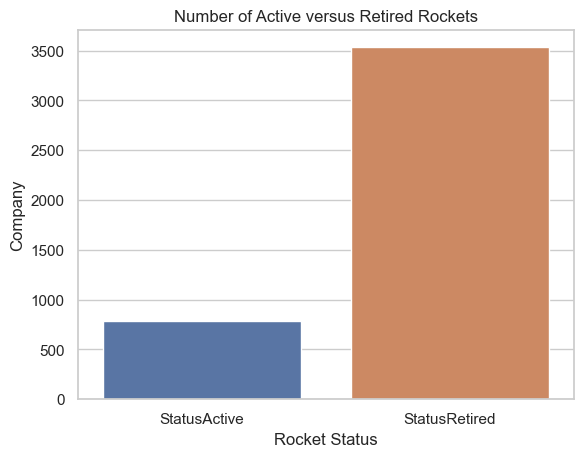

In [75]:
ax = sns.barplot(data=df_group_status, y='Organisation', x=df_group_status.index)
ax.set(ylabel='Company', xlabel='Rocket Status', title='Number of Active versus Retired Rockets')
plt.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [69]:
df_per_mission = df_clean.groupby('Mission_Status').count().sort_values('Organisation', ascending=False)

In [73]:
df_per_mission

,Organisation,Location,Date,Detail,Rocket_Status,Price
Mission_Status,,,,,,
Success,3878,3878,3878,3878,3878,909
Failure,339,339,339,339,339,36
Partial Failure,102,102,102,102,102,17
Prelaunch Failure,4,4,4,4,4,1


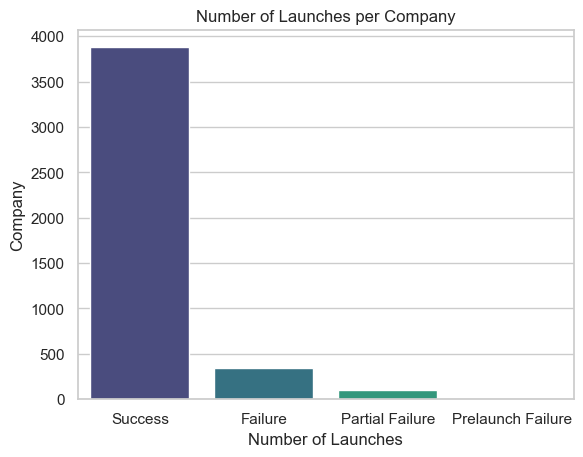

In [72]:
sns.set(style="whitegrid")
colors = sns.color_palette("viridis", len(df_per_mission))

ax = sns.barplot(data=df_per_mission, y='Organisation', x=df_per_mission.index, palette=colors)
ax.set(ylabel='Company', xlabel='Number of Launches', title='Number of Launches per Company')

plt.show()


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [80]:
df_clean['Price'].count()

963

In [79]:
df_clean['Price'].isna().sum()

3360

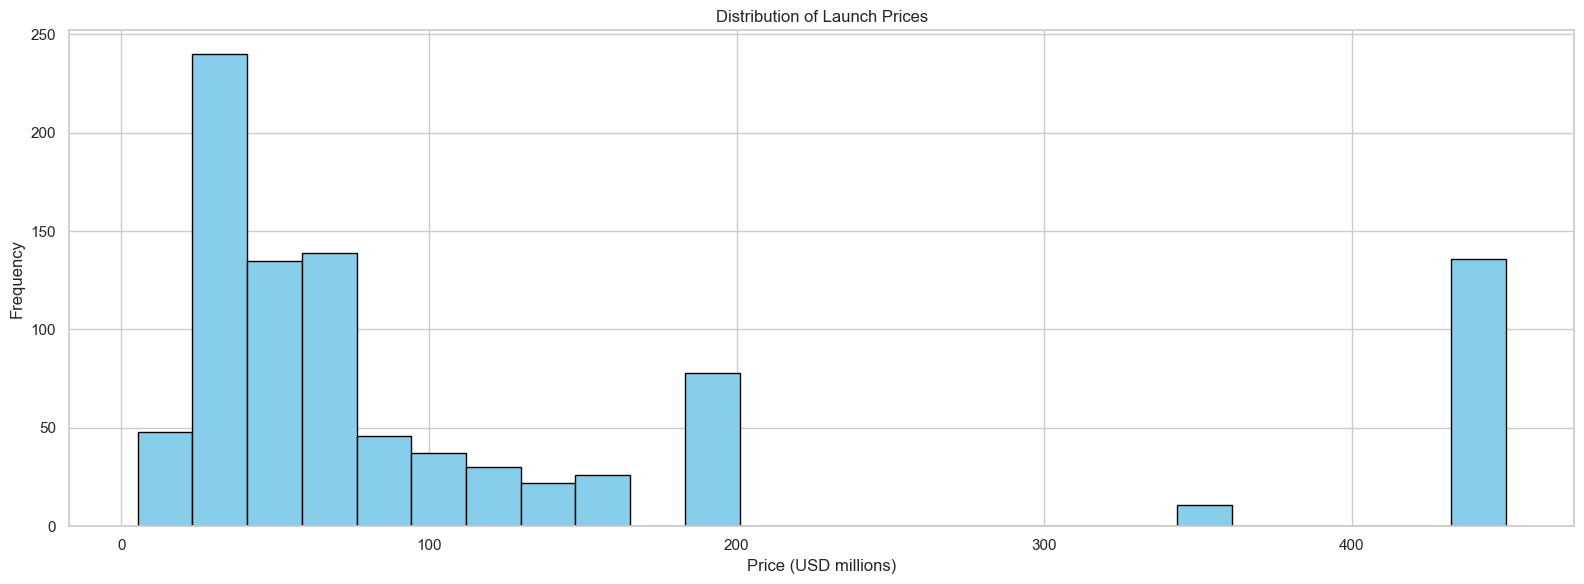

In [101]:
# Assuming df_clean is your DataFrame
df_clean['Price'] = pd.to_numeric(df_clean['Price'], errors='coerce')

# Drop rows with missing values in the 'Price' column
df_clean_filtered = df_clean.dropna(subset=['Price'])

# Create a histogram
plt.figure(figsize=(16, 6))
plt.hist(df_clean_filtered['Price'], bins=25, color='skyblue', edgecolor='black')
plt.title('Distribution of Launch Prices')
plt.xlabel('Price (USD millions)')
plt.ylabel('Frequency')


plt.tight_layout()
plt.show()

Most Expensives Launches

In [107]:
df_clean[df_clean['Price'] == 450]['Organisation']

682     NASA
687     NASA
695     NASA
726     NASA
733     NASA
        ... 
2300    NASA
2323    NASA
2348    NASA
2371    NASA
2408    NASA
Name: Organisation, Length: 136, dtype: object

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [122]:
def extract_info(location):
    # Check if there are at least two commas in the string
    if location.count(',') == 3:
        # Split the string by commas and get the third part
        return location.split(',')[3].strip()
    elif location.count(',') == 2:
        return location.split(',')[2].strip()
    else:
        return location.split(',')[1].strip()

# Apply the function to the 'Location' column
df_clean['Country'] = df_clean['Location'].apply(extract_info)

# Display the DataFrame
print(df_clean[['Location', 'Country']])

                                               Location     Country
0            LC-39A, Kennedy Space Center, Florida, USA         USA
1     Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...       China
2                         Pad A, Boca Chica, Texas, USA         USA
3          Site 200/39, Baikonur Cosmodrome, Kazakhstan  Kazakhstan
4              SLC-41, Cape Canaveral AFS, Florida, USA         USA
...                                                 ...         ...
4319           LC-18A, Cape Canaveral AFS, Florida, USA         USA
4320           LC-26A, Cape Canaveral AFS, Florida, USA         USA
4321           LC-18A, Cape Canaveral AFS, Florida, USA         USA
4322          Site 1/5, Baikonur Cosmodrome, Kazakhstan  Kazakhstan
4323          Site 1/5, Baikonur Cosmodrome, Kazakhstan  Kazakhstan

[4323 rows x 2 columns]


In [123]:
df_clean['Country'].unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russia', 'Shahrud Missile Test Site', 'France', 'Iran', 'India',
       'New Mexico', 'Yellow Sea', 'North Korea',
       'Pacific Missile Range Facility', 'Pacific Ocean', 'South Korea',
       'Barents Sea', 'Brazil', 'Gran Canaria', 'Kenya', 'Australia'],
      dtype=object)

In [127]:
# Replace some country names
country_name_mapping = {
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA',
}

df_clean['Country'] = df_clean['Country'].replace(country_name_mapping)



In [130]:
df_clean = df_clean.drop('Extracted_Info', axis=1)

In [135]:
print(iso3166.countries.get('Greece'))

Country(name='Greece', alpha2='GR', alpha3='GRC', numeric='300', apolitical_name='Greece')


In [138]:
# Convert country names to Alpha3 format
df_clean['Country_alpha3'] = df_clean['Country'].apply(lambda x: getattr(iso3166.countries.get(x,None), 'alpha3', None))


# Drop rows with missing or unrecognized country names
df_clean_filtered = df_clean.dropna(subset=['Country_alpha3'])

# Create a choropleth map
fig = px.choropleth(df_clean_filtered,
                    locations='Country_alpha3',
                    color='Country',
                    title='Number of Launches by Country',
                    color_continuous_scale=px.colors.sequential.matter)

fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [147]:
# Step 1: Filter rows with mission failures
df_failures = df_clean[df_clean['Mission_Status'].isin(['Failure', 'Prelaunch Failure', 'Partial Failure'])]

# Step 2: Group by country and count failures
failures_by_country = df_failures.groupby('Country_alpha3', as_index=False).agg({'Mission_Status': pd.Series.count})
failures_by_country.rename(columns={'Mission_Status': 'Failure_Count'}, inplace=True)

# Step 3: Create a choropleth map
fig = px.choropleth(failures_by_country,
                    locations='Country_alpha3',
                    color='Failure_Count',
                    title='Number of Failures by Country',
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

In [148]:
failures_by_country.head(2)

,Country_alpha3,Failure_Count
0,AUS,3
1,BRA,3


# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [149]:
df_clean.head(2)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_alpha3
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN


In [154]:
launches_per_category = df_clean.groupby(['Country','Organisation','Mission_Status'], as_index = False).agg({'Detail': pd.Series.count})

In [157]:
fig = px.sunburst(launches_per_category, path=['Country','Organisation', 'Mission_Status'], 
                  values='Detail')
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [163]:
df_clean_filtered = df_clean.dropna(subset=['Price'])

# Group by 'Organisation' and sum the 'Price' column
organisations_total_price = df_clean_filtered.groupby('Organisation').agg({'Price': pd.Series.sum}).sort_values('Price', ascending =False)

# Display the result
print(organisations_total_price)

                    Price
Organisation             
NASA            61,200.00
Arianespace     16,345.00
ULA             14,798.00
CASC             6,310.51
SpaceX           5,444.00
Northrop         3,930.00
MHI              3,532.50
ISRO             2,177.00
US Air Force     1,550.92
VKS RF           1,548.90
ILS              1,320.00
Boeing           1,241.00
Roscosmos        1,187.50
Martin Marietta    721.40
Kosmotras          638.00
Eurockot           543.40
Lockheed           280.00
JAXA               168.00
Rocket Lab          97.50
ESA                 37.00
ExPace              28.30
EER                 20.00
Sandia              15.00
Virgin Orbit        12.00


# Analyse the Amount of Money Spent by Organisation per Launch

In [165]:
df_clean_filtered.groupby('Organisation').agg({'Price': pd.Series.mean}).sort_values('Price', ascending = False)

,Price
Organisation,
NASA,450.00
Boeing,177.29
Arianespace,170.26
ULA,151.00
ILS,101.54
MHI,95.47
Martin Marietta,80.16
US Air Force,59.65
JAXA,56.00


# Chart the Number of Launches per Year

In [168]:
df_clean['Date']

0       Fri Aug 07, 2020 05:12 UTC
1       Thu Aug 06, 2020 04:01 UTC
2       Tue Aug 04, 2020 23:57 UTC
3       Thu Jul 30, 2020 21:25 UTC
4       Thu Jul 30, 2020 11:50 UTC
                   ...            
4319    Wed Feb 05, 1958 07:33 UTC
4320    Sat Feb 01, 1958 03:48 UTC
4321    Fri Dec 06, 1957 16:44 UTC
4322    Sun Nov 03, 1957 02:30 UTC
4323    Fri Oct 04, 1957 19:28 UTC
Name: Date, Length: 4323, dtype: object

In [170]:
df_clean['Date'] = pd.to_datetime(df_clean['Date'], format='%a %b %d, %Y %H:%M UTC', errors='coerce')

# Display the result
print(df_clean['Date'])

0      2020-08-07 05:12:00
1      2020-08-06 04:01:00
2      2020-08-04 23:57:00
3      2020-07-30 21:25:00
4      2020-07-30 11:50:00
               ...        
4319   1958-02-05 07:33:00
4320   1958-02-01 03:48:00
4321   1957-12-06 16:44:00
4322   1957-11-03 02:30:00
4323   1957-10-04 19:28:00
Name: Date, Length: 4323, dtype: datetime64[ns]


In [175]:
df_clean['Year'] = df_clean['Date'].dt.year

In [182]:
df_per_year = df_clean.groupby('Year', as_index = False).agg({'Detail':pd.Series.count})

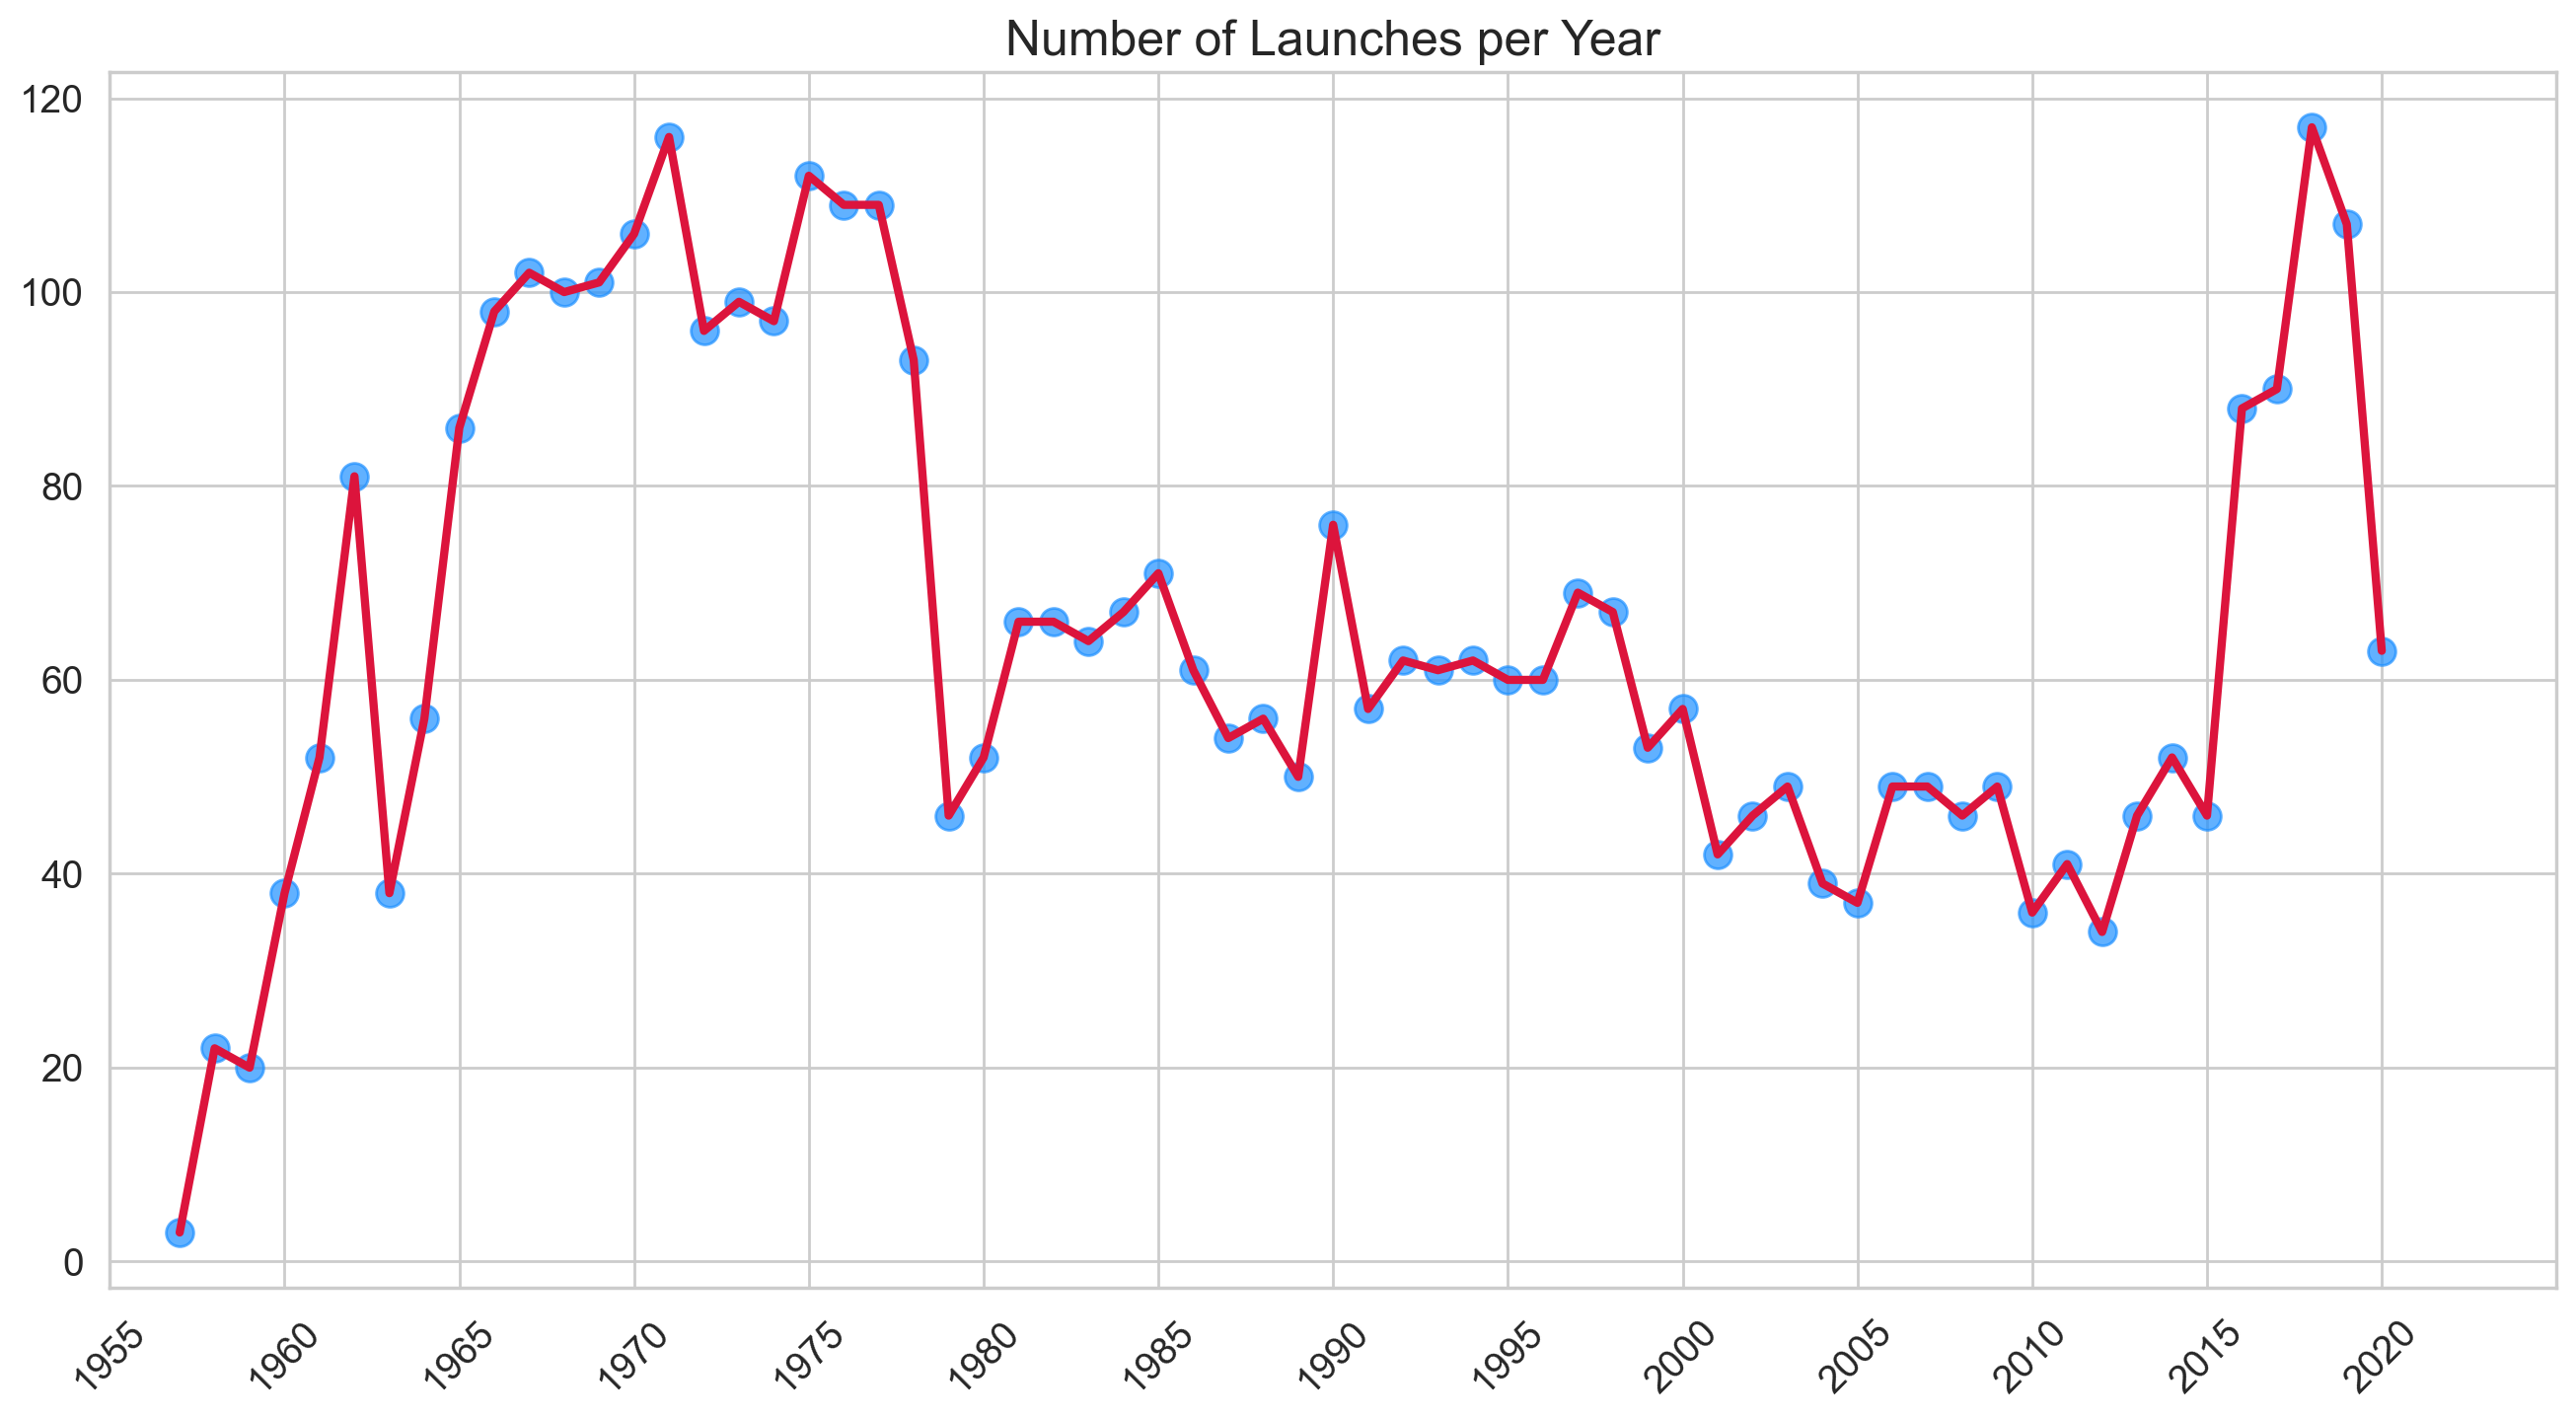

In [187]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Launches per Year', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(1955, 2025, step=5), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca()
ax1.set_xlim(1955, 2025)
 

 
ax1.scatter(x=df_per_year['Year'], 
           y=df_per_year['Detail'], 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(df_per_year['Year'], 
        df_per_year['Detail'], 
        c='crimson', 
        linewidth=3,)
 

 
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [188]:
df_clean['Month'] = df_clean['Date'].dt.month

Group By Year and Month

In [190]:
monthly_launches = df_clean.groupby(['Year', 'Month']).size().reset_index(name='Launches')


In [194]:
rolling_average = monthly_launches['Launches'].rolling(window=12, min_periods=1).mean()

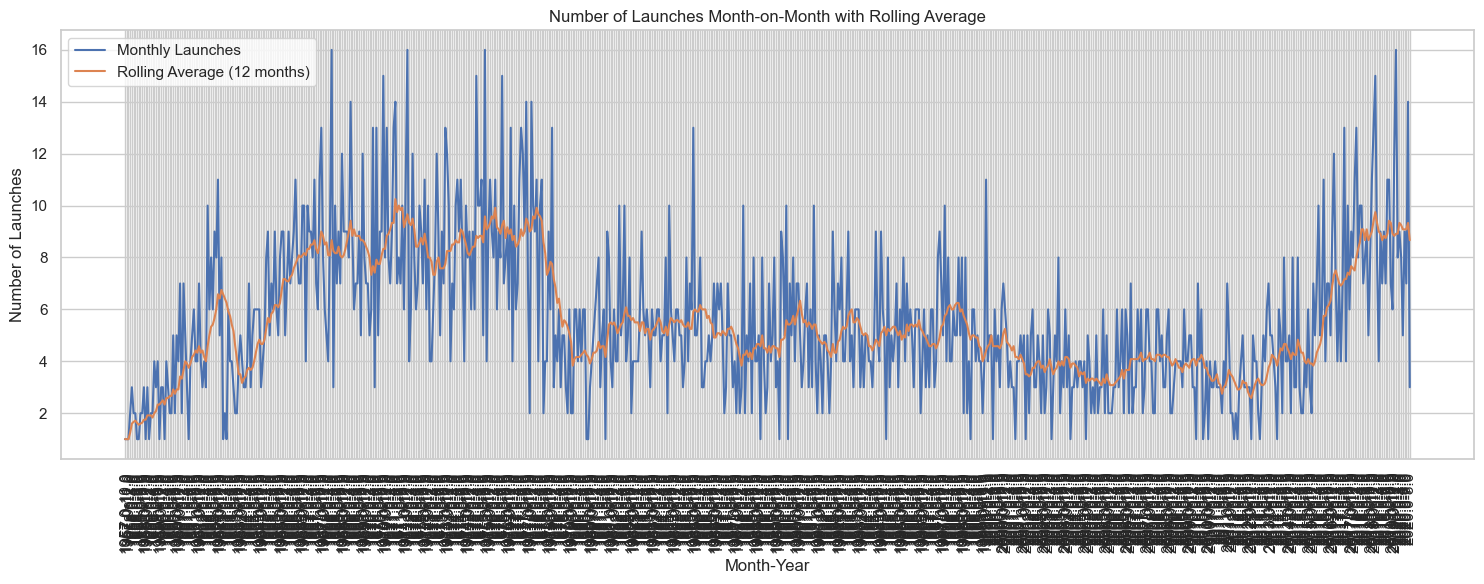

In [200]:
# Plotting
plt.figure(figsize=(15, 6))

plt.plot(monthly_launches['Year'].astype(str) + '-' + monthly_launches['Month'].astype(str), monthly_launches['Launches'], label='Monthly Launches')
plt.plot(monthly_launches['Year'].astype(str) + '-' + monthly_launches['Month'].astype(str), rolling_average, label='Rolling Average (12 months)')
plt.xlabel('Month-Year')
plt.ylabel('Number of Launches')
plt.title('Number of Launches Month-on-Month with Rolling Average')
plt.xticks(rotation=90)
plt.tight_layout()
plt.legend()
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [203]:
df_per_month = df_clean.groupby('Month', as_index = False).agg({'Detail':pd.Series.count})

In [208]:
df_per_month.sort_values('Month')

,Month,Detail
0,1.00,265
1,2.00,323
2,3.00,349
3,4.00,366
4,5.00,320
5,6.00,386
6,7.00,347
7,8.00,358
8,9.00,354
9,10.00,375


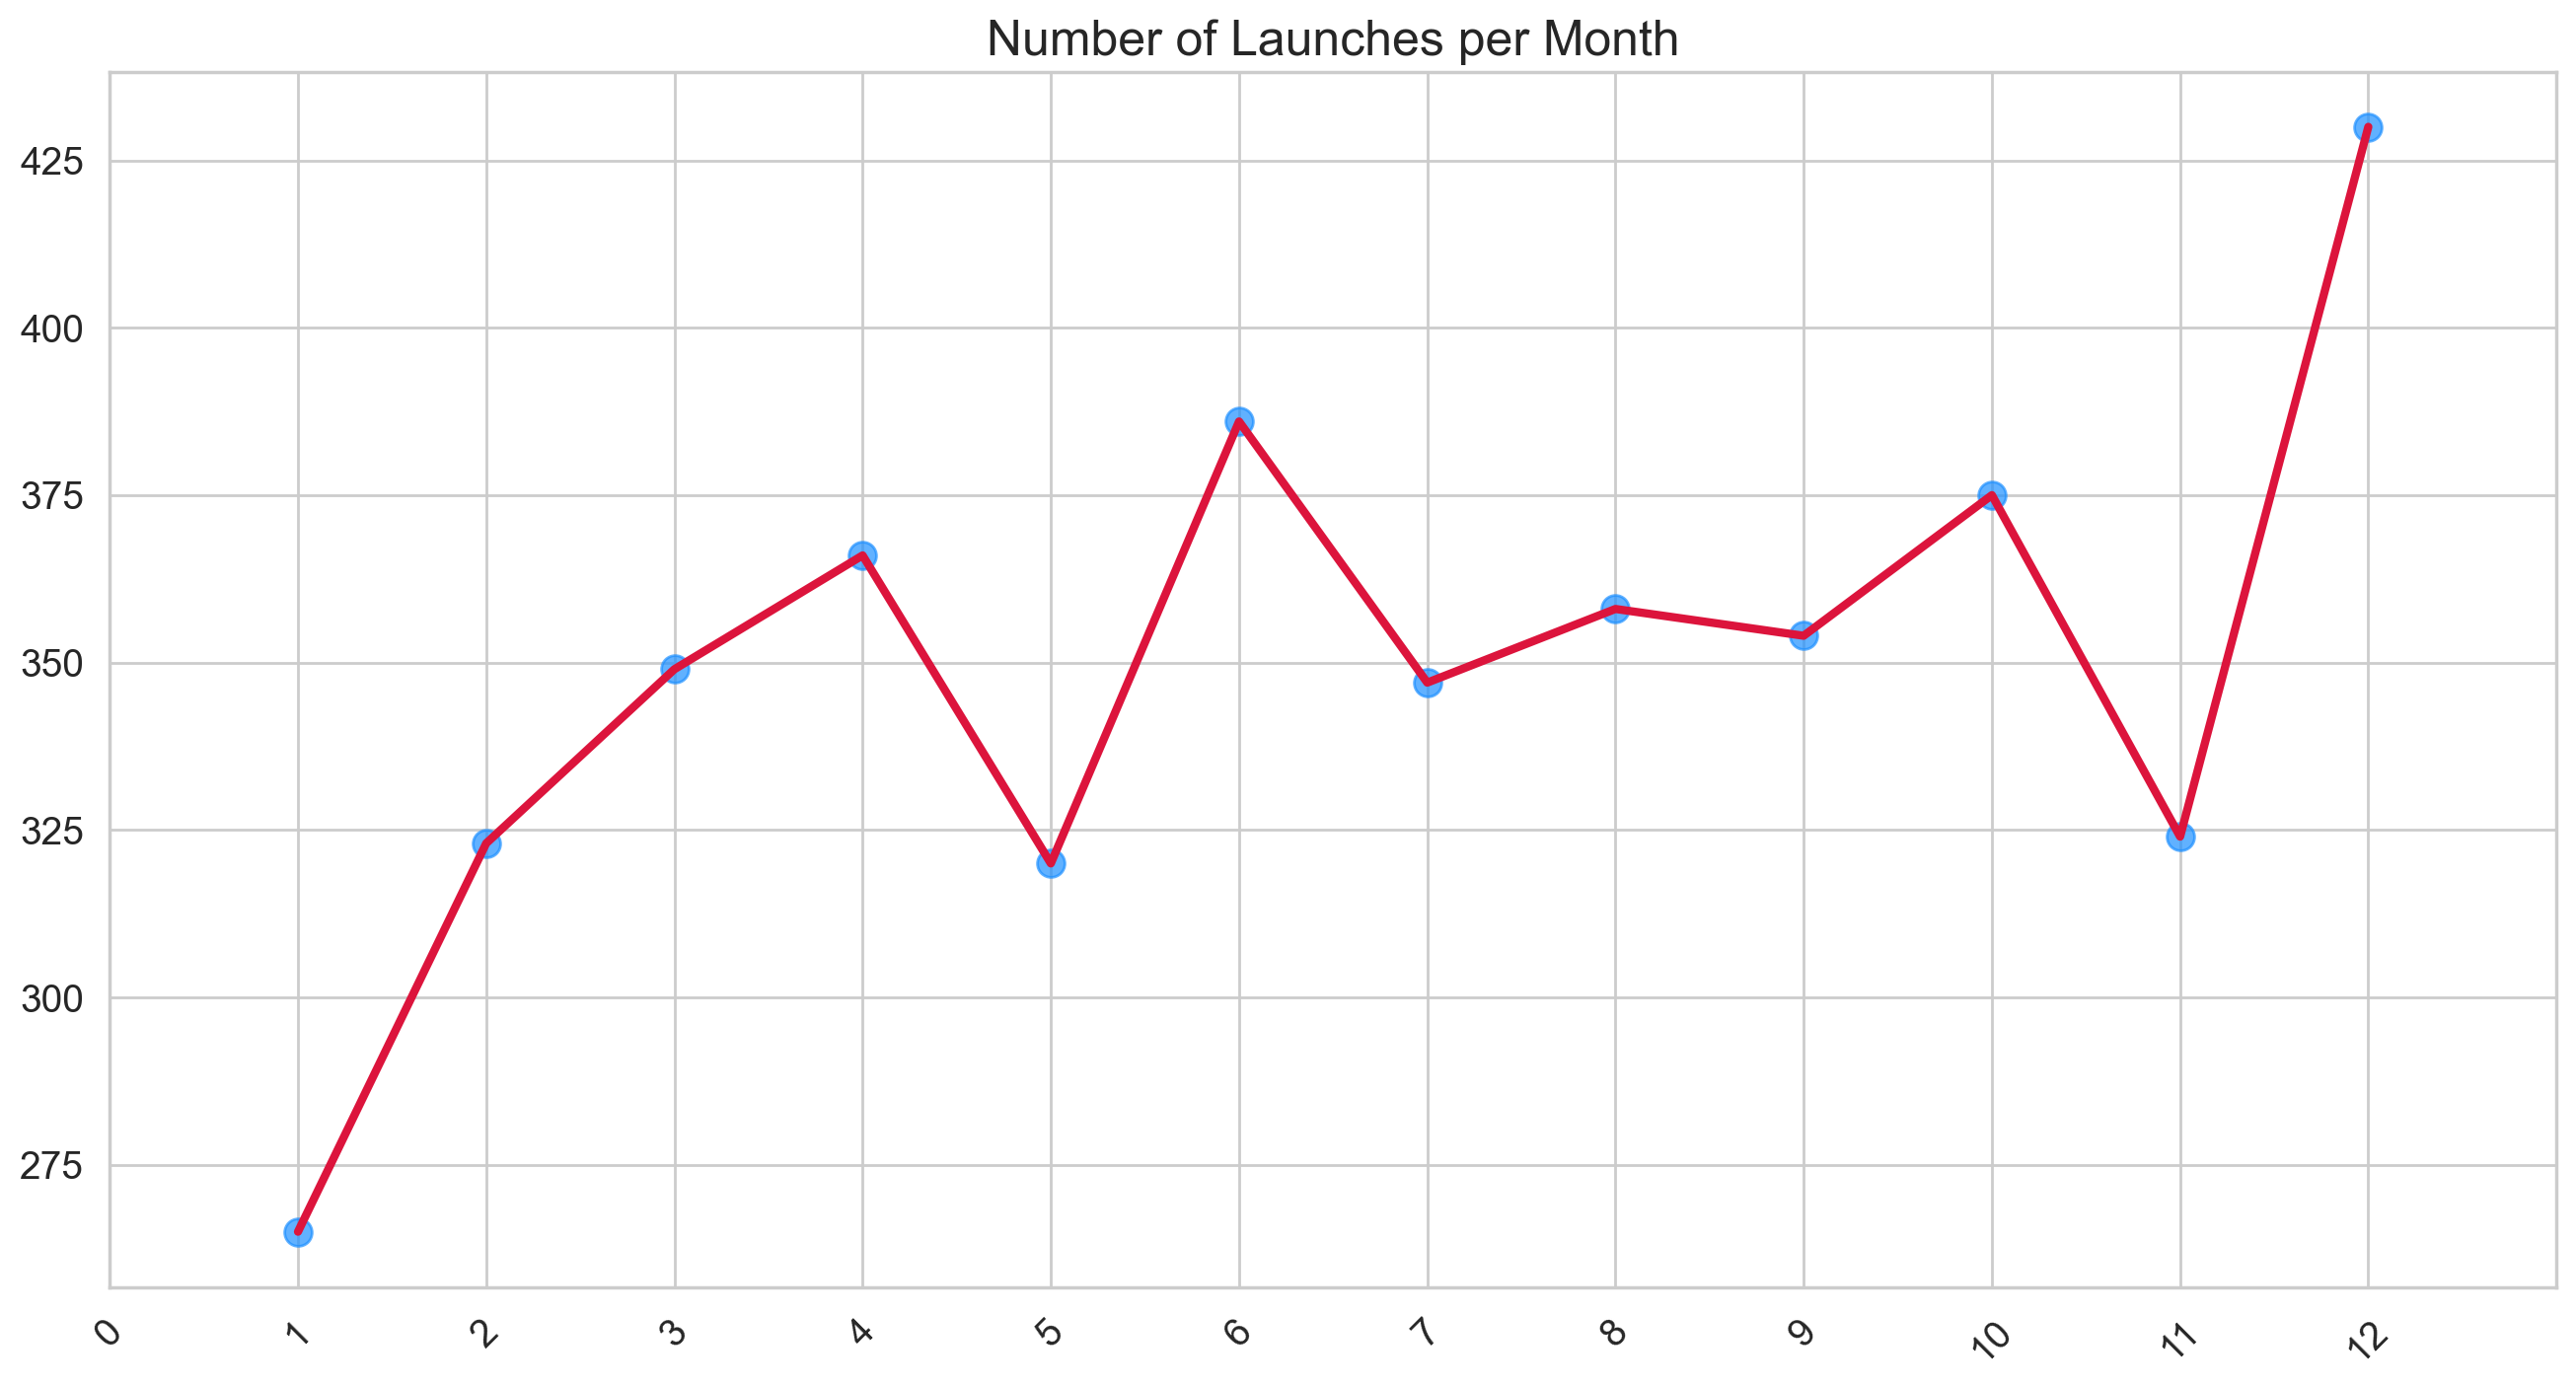

In [204]:
plt.figure(figsize=(16,8), dpi=200)
plt.title('Number of Launches per Month', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(ticks=np.arange(0, 13), 
           fontsize=14, 
           rotation=45)
 
ax1 = plt.gca()
ax1.set_xlim(0,13)
 

 
ax1.scatter(x=df_per_month['Month'], 
           y=df_per_month['Detail'], 
           c='dodgerblue',
           alpha=0.7,
           s=100,)
 
ax1.plot(df_per_month['Month'], 
        df_per_month['Detail'], 
        c='crimson', 
        linewidth=3,)
 

 
plt.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [212]:
df_clean_filtered = df_clean.dropna(subset=['Price'])


In [214]:
price_by_year = df_clean_filtered.groupby('Year').agg({'Price': pd.Series.mean})

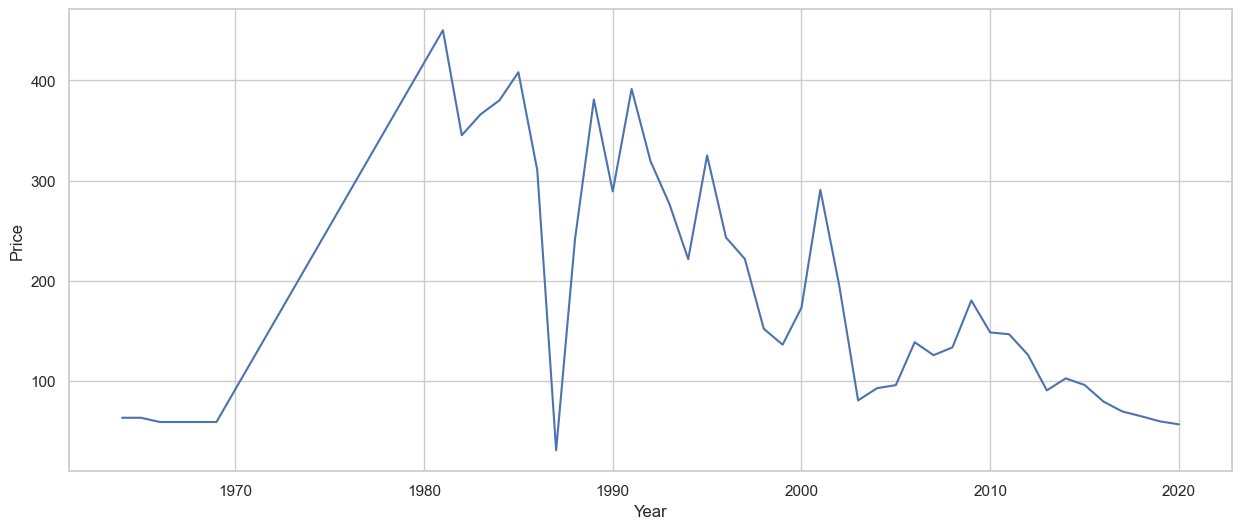

In [216]:
plt.figure(figsize=(15, 6))

ax = sns.lineplot(data=price_by_year, x=price_by_year.index, y='Price')

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

Top 10 Organizations

In [225]:
df_clean.groupby('Organisation').count().sort_values('Location', ascending = False).head(10).index

Index(['RVSN USSR', 'Arianespace', 'General Dynamics', 'CASC', 'NASA',
       'VKS RF', 'US Air Force', 'ULA', 'Boeing', 'Martin Marietta'],
      dtype='object', name='Organisation')

In [227]:
top_10_org = df_clean[df_clean['Organisation'].isin(['RVSN USSR', 'Arianespace', 'General Dynamics', 'CASC', 'NASA',
                                                     'VKS RF', 'US Air Force', 'ULA', 'Boeing', 'Martin Marietta'])]


In [229]:
launch_count = top_10_org.groupby(['Organisation', 'Year']).agg({'Detail': pd.Series.count}).reset_index()

In [234]:
fig = px.line(launch_count, x='Year', y='Detail', color='Organisation',
              title='Number of Launches Over Time by Top 10 Organizations',
              labels={'Detail': 'Number of Launches', 'Year': 'Year'})

# Show the plot
fig.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [235]:
ussr_usa_launches = df_clean[df_clean['Country'].isin(['Russian Federation', 'USA', 'Kazakhstan'])]

# Group by 'Country' and count the number of launches
launch_count_by_country = ussr_usa_launches['Country'].value_counts().reset_index()
launch_count_by_country.columns = ['Country', 'Number of Launches']

# Create a Pie Chart
fig = px.pie(launch_count_by_country, names='Country', values='Number of Launches',
             title='Total Number of Launches: USSR vs USA',
             labels={'Number of Launches': 'Number of Launches'})

# Show the plot
fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [236]:
superpowers_launches = df_clean[df_clean['Country'].isin(['Russian Federation', 'USA', 'Kazakhstan'])]

# Extract the year from the 'Date' column
superpowers_launches['Year'] = superpowers_launches['Date'].dt.year

# Group by 'Country' and 'Year' and count the number of launches
launch_count_by_superpower = superpowers_launches.groupby(['Country', 'Year']).size().reset_index(name='Number of Launches')

# Create a line chart
fig = px.line(launch_count_by_superpower, x='Year', y='Number of Launches', color='Country',
              title='Total Number of Launches Year-On-Year: USSR vs USA',
              labels={'Number of Launches': 'Number of Launches', 'Year': 'Year'})

# Show the plot
fig.show()

/var/folders/1t/95s86vvd1n74f1nj2tlv4gvm0000gn/T/ipykernel_16611/1334565345.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Chart the Total Number of Mission Failures Year on Year.

In [237]:
failures = df_clean[df_clean['Mission_Status'].isin(['Failure', 'Prelaunch Failure', 'Partial Failure'])]

# Extract the year from the 'Date' column
failures['Year'] = failures['Date'].dt.year

# Group by 'Year' and count the number of mission failures
failures_by_year = failures.groupby('Year').size().reset_index(name='Number of Failures')

# Create a line chart
fig = px.line(failures_by_year, x='Year', y='Number of Failures',
              title='Total Number of Mission Failures Year-On-Year',
              labels={'Number of Failures': 'Number of Mission Failures', 'Year': 'Year'})

# Show the plot
fig.show()


/var/folders/1t/95s86vvd1n74f1nj2tlv4gvm0000gn/T/ipykernel_16611/2198079463.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [238]:
df_clean['Year'] = df_clean['Date'].dt.year

# Group by 'Year' and calculate the percentage of failures
failure_percentage_by_year = df_clean.groupby('Year')['Mission_Status'].apply(lambda x: (x == 'Failure').mean() * 100).reset_index(name='Failure Percentage')

# Create a line chart
fig = px.line(failure_percentage_by_year, x='Year', y='Failure Percentage',
              title='Percentage of Failures Over Time',
              labels={'Failure Percentage': 'Percentage of Failures', 'Year': 'Year'})

# Show the plot
fig.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [239]:
# Group by 'Year' and 'Country' and calculate the total number of launches
total_launches_by_year_country = df_clean.groupby(['Year', 'Country']).size().reset_index(name='Total Launches')

# Find the index of the maximum launches for each year
max_launches_indices = total_launches_by_year_country.groupby('Year')['Total Launches'].idxmax()

# Extract the corresponding rows
top_countries_by_year = total_launches_by_year_country.loc[max_launches_indices]

# Create a bar chart
fig = px.bar(top_countries_by_year, x='Year', y='Total Launches', color='Country',
             title='Top Country in Total Launches Each Year (up to 2020)',
             labels={'Total Launches': 'Total Launches', 'Year': 'Year', 'Country': 'Country'})


fig.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [240]:
# Group by 'Year' and 'Organisation' and calculate the total number of launches
total_launches_by_year_org = df_clean.groupby(['Year', 'Organisation']).size().reset_index(name='Total Launches')

# Find the index of the maximum launches for each year
max_launches_indices = total_launches_by_year_org.groupby('Year')['Total Launches'].idxmax()

# Extract the corresponding rows
top_orgs_by_year = total_launches_by_year_org.loc[max_launches_indices]

# Create a line chart
fig = px.line(top_orgs_by_year, x='Year', y='Total Launches', color='Organisation',
              title='Top Organisation in Total Launches Each Year',
              labels={'Total Launches': 'Total Launches', 'Year': 'Year', 'Organisation': 'Organisation'})

# Show the plot
fig.show()